ANALYSIS OF STROKE PATIENTS

In [ ]:
# import the necessary data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold,cross_val_score, RepeatedStratifiedKFold,StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import OneHotEncoder,StandardScaler,PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyClassifier
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier

import plotly
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

import missingno as msno

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# import the files
from google.colab import files
uploaded=files.upload()

Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data.csv


In [ ]:
import io
stroke=pd.read_csv(io.BytesIO(uploaded['healthcare-dataset-stroke-data.csv']))

In [ ]:
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
stroke.shape

(5110, 12)

In [ ]:
# let us drop the ID column

In [ ]:
stroke.drop('id', axis=1, inplace=True)

In [ ]:
stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [ ]:
stroke.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
# bmi column has null values

In [ ]:
stroke.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# Insights from the analysis
In our dataset, we have both numerical and categorical variables.

It is essential to see whether columns are correctly inferred.

The most important one to look for is our target variable 'stroke'
'Stroke' is detected as an integer, not as an object.

Target variable is coded as 1 for positive cases (has a stroke) and 0 for negative cases (does not have a stroke)

Both 'Hypertension' and 'heart disease" are detected as an integer, not as an object.

Just remember from the data definition part, they are coded as 1 for the positive cases(has hypertension/heart disease)

And 0 for the negative cases (does not have hypertension/heart disease)

We don't need to change them, but it is good to see and be aware of it.

In addition to them, we have 3 categorical variables, which we have to encode as numerical.

In [ ]:
# lets find the target variable-nwhich is stroke
y=stroke['stroke']

In [ ]:
stroke['stroke'].value_counts() # it is evident that few people had stroke

0    4861
1     249
Name: stroke, dtype: int64

<Axes: xlabel='stroke', ylabel='count'>

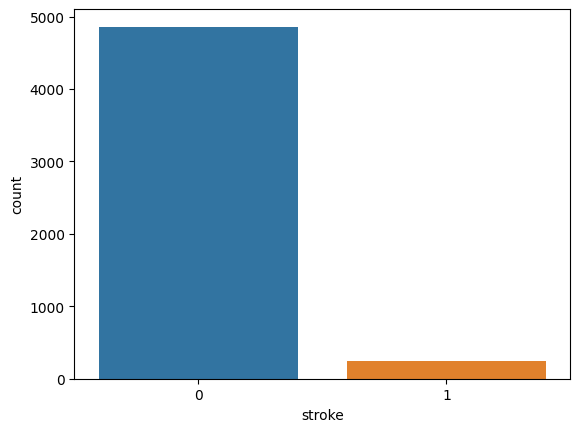

In [ ]:
sns.countplot(stroke, x=stroke['stroke'])

In [ ]:
## this visualization shows that there is an imbalanced data
# if the data is imbalanced then other methods like ROC/AUC perform better in evaluating the model performance.
# We have already seen the label/target distribution, and we know that it is a binary classification problem with skewed targets. Thus, we will be using StratifiedKFold to split the data
# Just for further info, it is not advisable to use accuracy as an evaluation metric, when dealing with higly imbalanced data.

# DEALING WITH MISSING VALUES

In [ ]:
#bmi has 201 missing values

<Axes: >

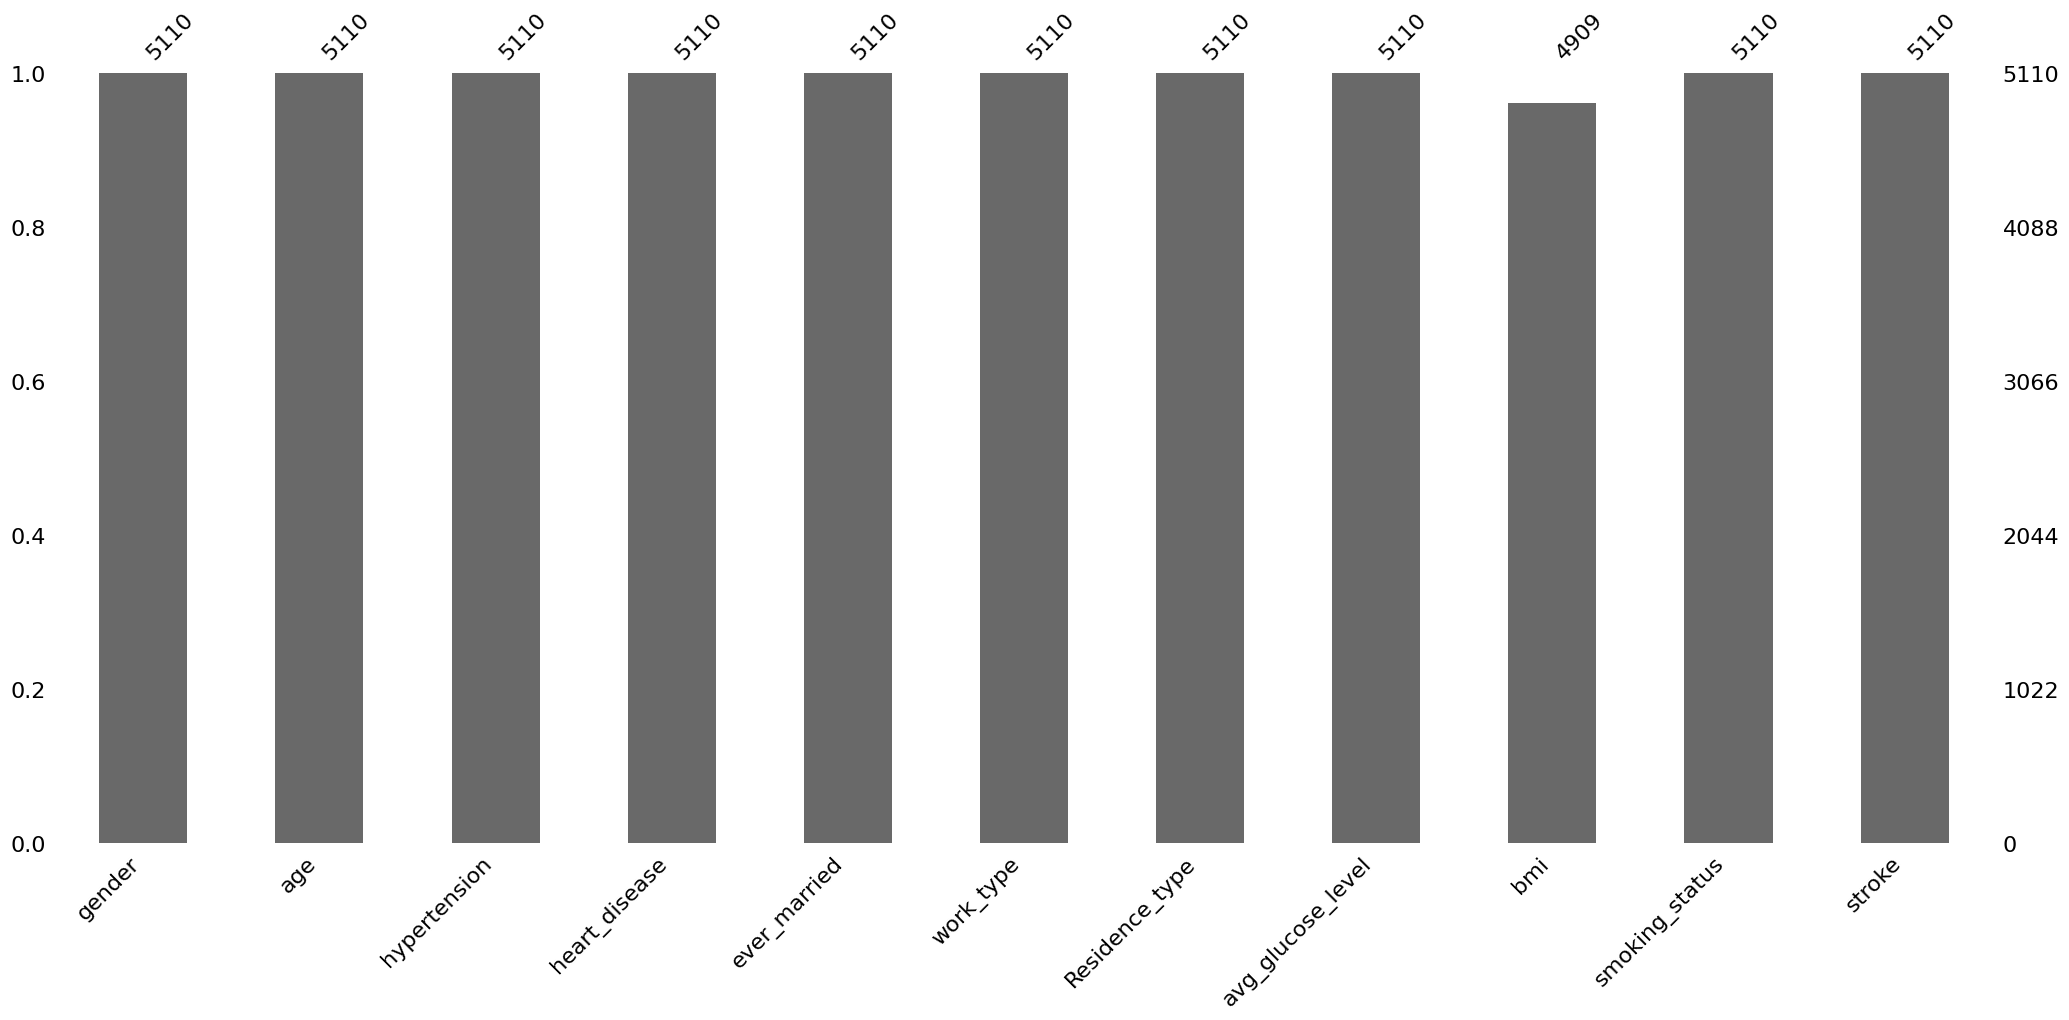

In [ ]:
msno.bar(stroke)

<Axes: >

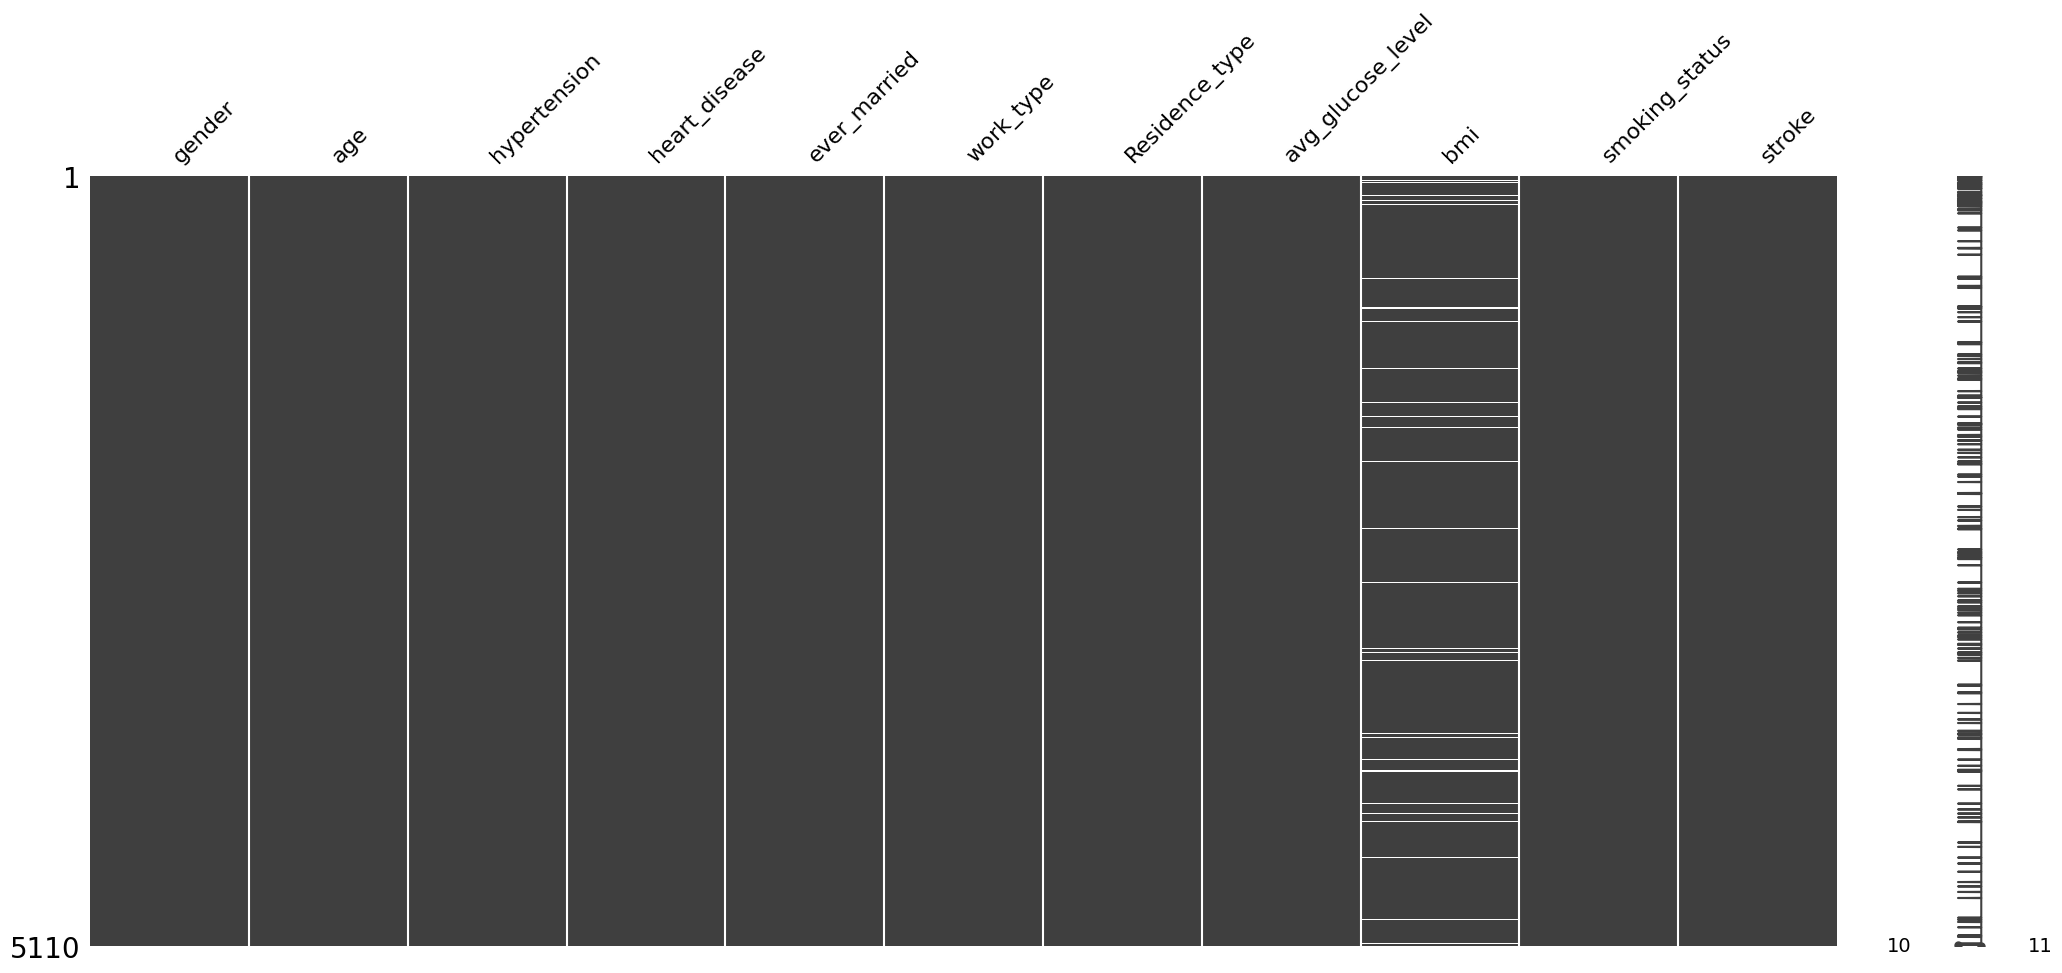

In [ ]:
msno.matrix(stroke)

NUMERICAL AND CATEGORICAL FEATURES

In [ ]:
numerical= stroke.select_dtypes('number').columns
numerical

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke'],
      dtype='object')

In [ ]:
categorical = stroke.select_dtypes('object').columns
categorical

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [ ]:
stroke[numerical].describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
numerical1=['age','avg_glucose_level', 'bmi']

In [ ]:
stroke[numerical1].describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,4909.000000
mean,43.226614,106.147677,28.893237
std,22.612647,45.283560,7.854067
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.500000
50%,45.000000,91.885000,28.100000
75%,61.000000,114.090000,33.100000
max,82.000000,271.740000,97.600000


In [ ]:
# let us check the skewnwss of our data
stroke[numerical1].skew()  # Based on the result, age has slight left skew, other two features have right tail, positively skewed shape distribution.

age                 -0.137059
avg_glucose_level    1.572284
bmi                  1.055340
dtype: float64

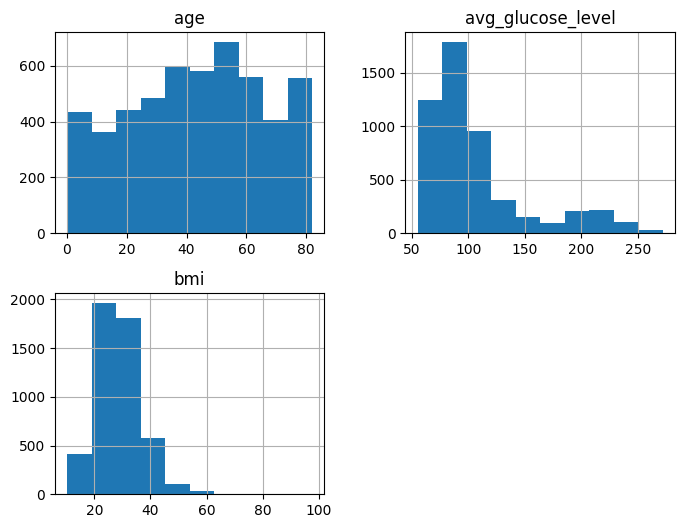

In [ ]:
stroke[numerical1].hist(figsize=(8,6));

Categorical features

In [ ]:
stroke['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

<Axes: xlabel='gender', ylabel='count'>

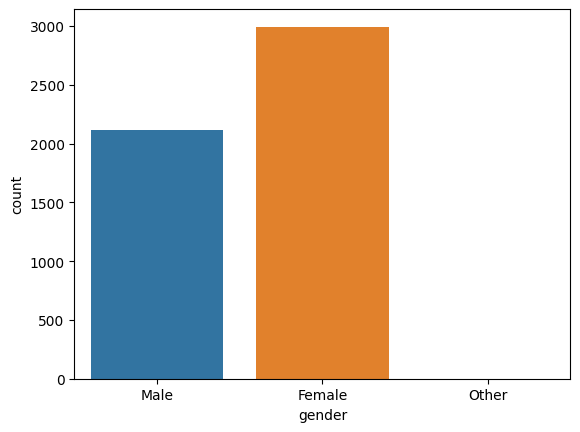

In [ ]:
sns.countplot(stroke, x=stroke['gender'])

Hypertension

In [ ]:
stroke['hypertension'].value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

<Axes: xlabel='hypertension', ylabel='count'>

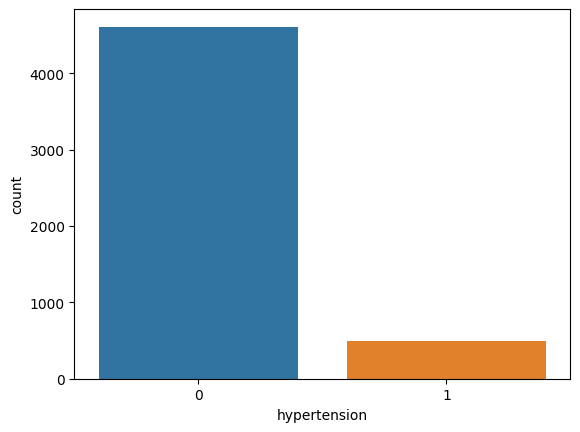

In [ ]:
sns.countplot(stroke, x=stroke['hypertension'])

Heart disease

In [ ]:
stroke['heart_disease'].value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64

<Axes: xlabel='heart_disease', ylabel='count'>

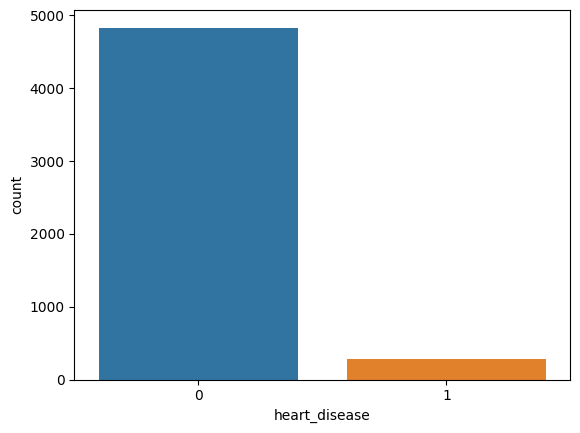

In [ ]:
sns.countplot(stroke, x=stroke['heart_disease'])

Married

In [ ]:
stroke['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

<Axes: xlabel='ever_married', ylabel='count'>

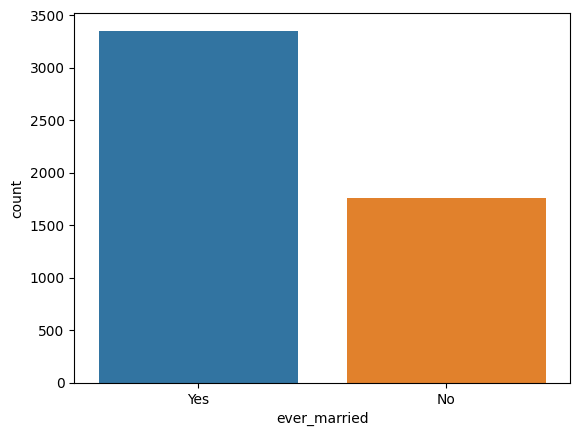

In [ ]:
sns.countplot(stroke, x=stroke['ever_married'])

Work Type

In [ ]:
stroke['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

<Axes: xlabel='work_type', ylabel='count'>

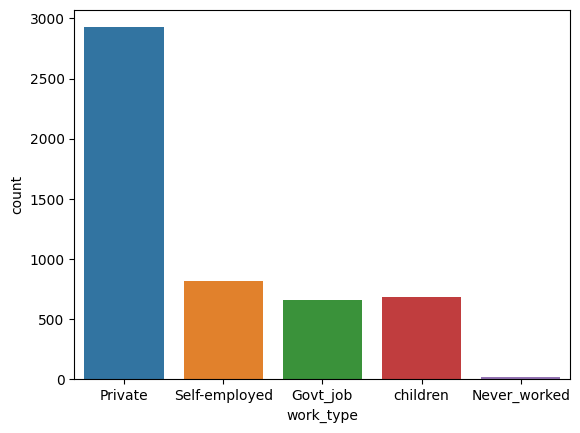

In [ ]:
sns.countplot(stroke, x=stroke['work_type'])

Residence Type

In [ ]:
stroke['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

<Axes: xlabel='Residence_type', ylabel='count'>

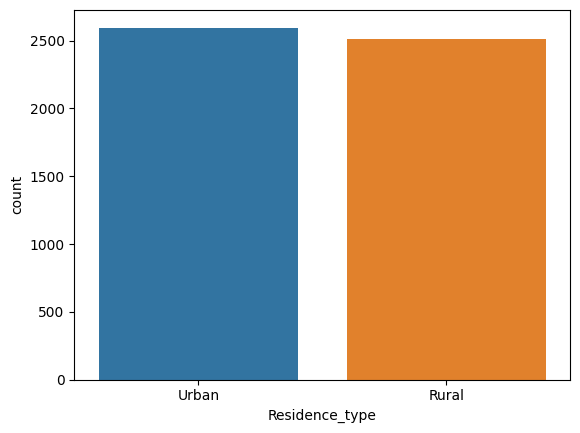

In [ ]:
sns.countplot(stroke, x=stroke['Residence_type'])

Smoking

In [ ]:
stroke['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

<Axes: xlabel='smoking_status', ylabel='count'>

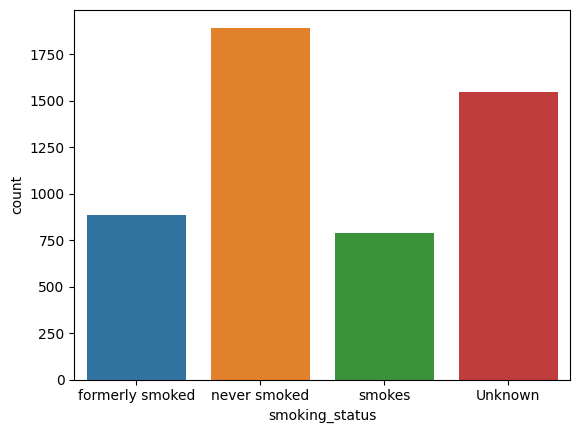

In [ ]:
sns.countplot(stroke, x=stroke['smoking_status'])

# Bivariate Analysis

Hypertension & Stroke

In [ ]:
(stroke[stroke["hypertension"]==1]["stroke"].mean())


0.13253012048192772

In [ ]:
(stroke[stroke["hypertension"]==0]["stroke"].mean())

0.03967909800520382

In [ ]:


fig = px.histogram(stroke, x="hypertension", color="stroke",width=400, height=400)
fig.show()


In [ ]:

#As we have seen, stroke probability for those who has hypertension are quite different than for those who don't. 13.2% and 3.9% respectively
#   A person with hypertension are almost 3.3 time more likely to get stroke than the ones who don't have hypertension

Gender & Stroke

In [ ]:
(stroke[stroke["gender"]=="Female"]["stroke"].mean())

0.047094188376753505

In [ ]:
(stroke[stroke["gender"]=="Male"]["stroke"].mean())

0.05106382978723404

In [ ]:
(stroke[stroke["gender"]=="Other"]["stroke"].mean())

0.0

In [ ]:
fig = px.histogram(stroke, x="gender", color="stroke",width=400, height=400)
fig.show()

In [ ]:
# males are more likely to get a stroke compared to females

Heart disease and stroke

In [ ]:
(stroke[stroke["heart_disease"]==1]["stroke"].mean())

0.17028985507246377

In [ ]:
(stroke[stroke["heart_disease"]==0]["stroke"].mean())

0.041787339677285894

In [ ]:
fig = px.histogram(stroke, x="heart_disease", color="stroke",width=400, height=400)
fig.show()

In [ ]:
# As we have seen, stroke probability for those who has heart disease are quite different than for those who don't.
# 17.03% and  4.18% respectively
# It means that person with heart diease are 4.07 times more likely to get stroke than the ones who don't have heart disease.

Married & Stroke

In [ ]:
stroke[stroke["ever_married"]=="Yes"]["stroke"].mean()

0.0656128839844915

In [ ]:
stroke[stroke["ever_married"]=="No"]["stroke"].mean()

0.016505406943653957

In [ ]:
fig = px.histogram(stroke, x="ever_married", color="stroke",width=400, height=400)
fig.show()

In [ ]:
# married(6.5%) individuals have a high probability of getting a stroke compared to those not married(1.6%)

Work Type & Stroke

In [ ]:
stroke[stroke["work_type"]=="Private"]["stroke"].mean()

0.05094017094017094

In [ ]:
stroke[stroke["work_type"]=="Self-employed"]["stroke"].mean()

0.07936507936507936

In [ ]:
stroke[stroke["work_type"]=="Govt_job"]["stroke"].mean()

0.0502283105022831

In [ ]:
stroke[stroke["work_type"]=="children"]["stroke"].mean()

0.002911208151382824

In [ ]:
stroke[stroke["work_type"]=="Never_worked"]["stroke"].mean()

0.0

In [ ]:
fig = px.histogram(stroke, x="work_type", color="stroke",width=600, height=600)
fig.show()

In [ ]:
# self employrd people are more likely to get stroke while people who never worked did not suffer from stroke

Residence Type & Stroke

In [ ]:
stroke[stroke["Residence_type"]=="Urban"]["stroke"].mean()

0.052003081664098616

In [ ]:
stroke[stroke["Residence_type"]=="Rural"]["stroke"].mean()

0.045346062052505964

In [ ]:
fig = px.histogram(stroke, x="Residence_type", color="stroke",width=400, height=400)
fig.show()

In [ ]:
# Person who lives in rural area slightly has more probablity to get sroke than a person who lives in rural area. Difference is small.

Smoking & Stroke

In [ ]:
stroke[stroke["smoking_status"]=="formerly smoked"]["stroke"].mean()

0.07909604519774012

In [ ]:
stroke[stroke["smoking_status"]=="never smoked"]["stroke"].mean()

0.04756871035940803

In [ ]:
stroke[stroke["smoking_status"]=="smokes"]["stroke"].mean()

0.053231939163498096

In [ ]:
stroke[stroke["smoking_status"]=="Unknown"]["stroke"].mean()

0.03044041450777202

In [ ]:
fig = px.histogram(stroke, x="smoking_status", color="stroke",width=600, height=600)
fig.show()

In [ ]:
# former smokers are highly likely to get a stroke compared to others

# Metrics of Importance
The degree of dependency between a categorical variable and the target variable can be measured by using mutual info score.

Higher values of mutual information mean a higher degree of dependence.

Higher the mutual info score implies that we can get the better prediction on the target variable

In [ ]:
from sklearn.metrics import mutual_info_score
def cat_mut_inf(series):
    return mutual_info_score(series, stroke['stroke'])

df_cat = stroke[categorical].apply(cat_mut_inf)
df_cat = df_cat.sort_values(ascending=False).to_frame(name='mutual_info_score')
df_cat

,mutual_info_score
ever_married,0.006950
work_type,0.006825
smoking_status,0.002750
Residence_type,0.000120
gender,0.000051


Correlation Matrix & Scatter Plots

In [ ]:
stroke[numerical1].corr()

,age,avg_glucose_level,bmi
age,1.000000,0.238171,0.333398
avg_glucose_level,0.238171,1.000000,0.175502
bmi,0.333398,0.175502,1.000000


In [ ]:
stroke.groupby('stroke')[numerical1].mean()

,age,avg_glucose_level,bmi
stroke,,,
0,41.971545,104.795513,28.823064
1,67.728193,132.544739,30.471292


In [ ]:
# numerical varaible correlation with target variable
stroke[['age','avg_glucose_level','bmi','stroke']].corr()

,age,avg_glucose_level,bmi,stroke
age,1.000000,0.238171,0.333398,0.245257
avg_glucose_level,0.238171,1.000000,0.175502,0.131945
bmi,0.333398,0.175502,1.000000,0.042374
stroke,0.245257,0.131945,0.042374,1.000000


age and bmi

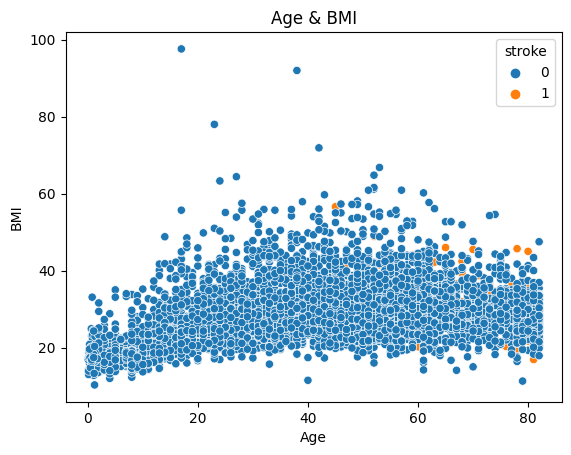

In [ ]:
# lets draw a scatterplot
sns.scatterplot(data=stroke, x='age', y='bmi', hue='stroke')
plt.title('Age & BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

age and glucose level

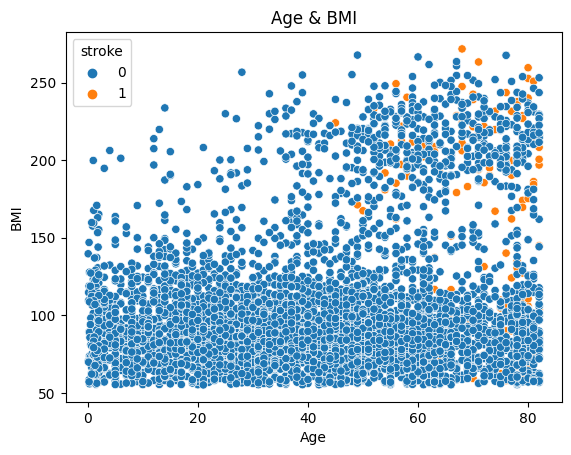

In [ ]:
sns.scatterplot(data=stroke, x='age', y='avg_glucose_level', hue='stroke')
plt.title('Age & BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

Average Glucose Level & BMI

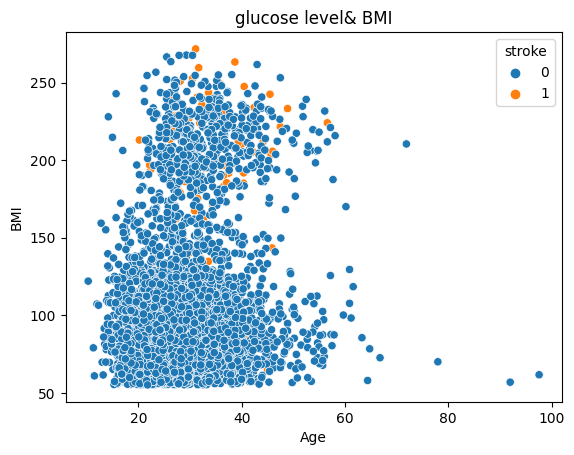

In [ ]:
sns.scatterplot(data=stroke, x='bmi', y='avg_glucose_level', hue='stroke')
plt.title('glucose level& BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()